#%% [markdown]

 # requirements

In [ ]:
import math
import itertools
import time
from datetime import timedelta, datetime
import numpy as np
import pandas as pd
#Graph
import seaborn  as sns
import matplotlib.pyplot as plt
# root path
import sys
import os

# Add the project root directory to sys.path
project_root = os.path.abspath(os.path.join(os.path.dirname(__file__), ".."))
sys.path.append(project_root)

# Now you can import from src
from src.app.utils import open_json

#%% [markdown]

 # data

In [ ]:
df = pd.read_json('../data/data_jobs.json')
df

,vacancy_name,company,location,work_modality_english,seniority,link,job_function,industries,description,apply_link,publication_date,query_keyword,country,scraping_date
0,"Artificial Intelligence Engineer, LearnWith.AI...",Trilogy,Colombia,Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/artificial-i...,Engineering,"Software Development, IT Services and IT Consu...",Are you ready to transform education through a...,,2025-06-10,Senior AI Engineer,colombia,2025-06-11
1,Desarrollador Python Junior - Trabajo Remoto,BairesDev,Colombia,Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/desarrollado...,Information Technology,IT Services and IT Consulting,En BairesDev® llevamos 15 años liderando proye...,,2025-06-11,Machine Learning,colombia,2025-06-11
2,Desarrollador de Python,PlatformX Solutions,Colombia,Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/desarrollado...,Engineering and Information Technology,IT Services and IT Consulting,PlatformX Solutions\n\nSomos una empresa nativ...,,2025-06-10,Machine Learning,colombia,2025-06-11
3,Python Developer - Trabajo Remoto,BairesDev,"Bogota, D.C., Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/python-devel...,Information Technology,IT Services and IT Consulting,En BairesDev® llevamos 15 años liderando proye...,,2025-06-11,Machine Learning,colombia,2025-06-11
4,Senior DevOps Engineer,Amadeus,"Bogota, D.C., Capital District, Colombia",Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/senior-devop...,Engineering and Information Technology,IT Services and IT Consulting,Job Title\n\nSenior DevOps Engineer\n\nAbout T...,,2025-06-11,Model Deployment Engineer,colombia,2025-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,Desarrollador de back-end,Haintech Solutions,Colombia,Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/desarrollado...,Engineering and Information Technology,IT Services and IT Consulting,Requisitos Técnicos:Lenguaje Programación:Domi...,None,2025-06-11,C++,Colombia,2025-06-11
647,Desarrollador Python Junior - Trabajo Remoto,BairesDev,Colombia,Full-time,Mid-Senior level,https://co.linkedin.com/jobs/view/desarrollado...,Information Technology,IT Services and IT Consulting,En BairesDev® llevamos 15 años liderando proye...,None,2025-06-11,C++,Colombia,2025-06-11
648,Engineering Manager,redbee,"Colombia, Huila, Colombia",Full-time,Not Applicable,https://co.linkedin.com/jobs/view/engineering-...,Engineering and Information Technology,Software Development,"Buscamos Engineering Managers curiosos, jugado...",None,2025-06-11,C++,Colombia,2025-06-11
649,Back-End Developer,TechD,Colombia,Full-time,Entry level,https://co.linkedin.com/jobs/view/back-end-dev...,Engineering and Information Technology,Software Development,¿Eres un desarrollador apasionado por la intel...,None,2025-06-11,C++,Colombia,2025-06-11


In [ ]:
# %%

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 651 entries, 0 to 650
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   vacancy_name           651 non-null    object
 1   company                651 non-null    object
 2   location               651 non-null    object
 3   work_modality_english  651 non-null    object
 4   seniority              651 non-null    object
 5   link                   651 non-null    object
 6   job_function           650 non-null    object
 7   industries             651 non-null    object
 8   description            651 non-null    object
 9   apply_link             389 non-null    object
 10  publication_date       651 non-null    object
 11  query_keyword          651 non-null    object
 12  country                651 non-null    object
 13  scraping_date          651 non-null    object
dtypes: object(14)
memory usage: 76.3+ KB


In [ ]:
# %%

df_types = pd.DataFrame(df.dtypes)
object_features = df_types[df_types[0] == 'object'].index.to_list()
object_features

['vacancy_name',
 'company',
 'location',
 'work_modality_english',
 'seniority',
 'link',
 'job_function',
 'industries',
 'description',
 'apply_link',
 'publication_date',
 'query_keyword',
 'country',
 'scraping_date']

In [ ]:
# %%

float_features = df_types[df_types[0] == 'float64'].index.to_list()
float_features

[]

In [ ]:
# %%

int_features = df_types[df_types[0] == 'int64'].index.to_list()
int_features

[]

In [ ]:
# %%

bool_features = df_types[df_types[0] == 'bool'].index.to_list()
bool_features

[]

In [ ]:
#%%

df.describe().T

,count,unique,top,freq
vacancy_name,651,235,Senior Data Scientist,27
company,651,171,BairesDev,91
location,651,28,Colombia,322
work_modality_english,651,2,Full-time,649
seniority,651,5,Mid-Senior level,447
link,651,475,https://co.linkedin.com/jobs/view/senior-data-...,19
job_function,650,50,Information Technology,213
industries,651,84,IT Services and IT Consulting,244
description,651,278,We are seeking a Senior Data Scientist with de...,19
apply_link,389,1,,389


In [ ]:
# %%

df[object_features].describe(include='all').T

,count,unique,top,freq
vacancy_name,651,235,Senior Data Scientist,27
company,651,171,BairesDev,91
location,651,28,Colombia,322
work_modality_english,651,2,Full-time,649
seniority,651,5,Mid-Senior level,447
link,651,475,https://co.linkedin.com/jobs/view/senior-data-...,19
job_function,650,50,Information Technology,213
industries,651,84,IT Services and IT Consulting,244
description,651,278,We are seeking a Senior Data Scientist with de...,19
apply_link,389,1,,389


In [ ]:
# %%

for col in object_features:
    print(f'------>{col} : {df[col].unique()}')
    print(f'------>{col} : {df[col].value_counts(dropna=False)}')

------>vacancy_name : ['Artificial Intelligence Engineer, LearnWith.AI (Remote) - $200,000/year USD'
 'Desarrollador Python Junior - Trabajo Remoto' 'Desarrollador de Python'
 'Python Developer - Trabajo Remoto' 'Senior DevOps Engineer'
 'Senior Data Scientist' 'Marketing Lead, Brand & Content'
 'Engenheiro de dados senior brl k mes pj'
 'Senior Specialist, Legal Specialists (Regulatory Examinations)-R-250773'
 'Engineering Manager, Ubuntu Server - cloud-init' 'Data Engineer'
 'Software Engineer' 'Python Developer - Remote Work'
 'Científico de datos senior' 'Senior Data Analyst'
 'Backend Developer (Python/AWS)' 'Desarrollador(a) Python Senior'
 'Data Engineering Associate' 'Fullstack Software Engineer Associate'
 'Backend Software Engineer Associate'
 'Associate Managing Consultant, Advisors – Performance Analytics-R-251261'
 'Business Analyst - Remote' 'Business Analyst' 'Senior Data Engineer'
 'Data Engineer (Azure)' 'Engineering Manager, Ubuntu Server - Ubuntu Pro'
 'Engineering M

#%%[markdown]

 ## null values visualization

Text(50.722222222222214, 0.5, 'Fila')

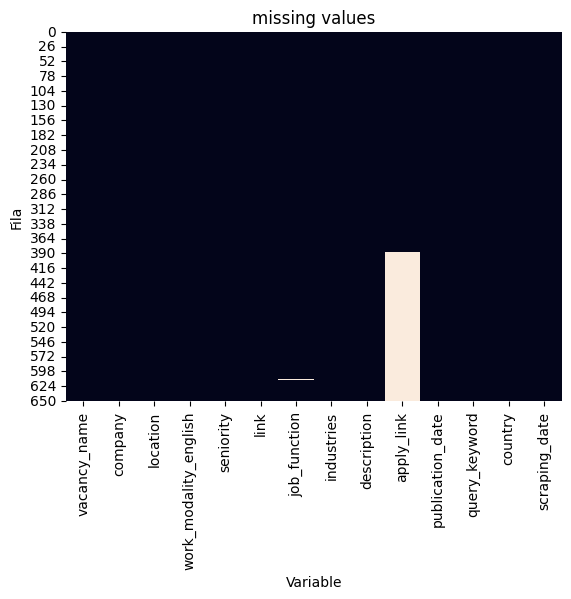

In [ ]:
# %%

sns.heatmap(df.isnull(), cbar=False)
plt.title("missing values")
plt.xlabel('Variable')
plt.ylabel('Fila')

#%%[markdown]

 # categorical variables

Text(0.5, 1.0, "'industries'")

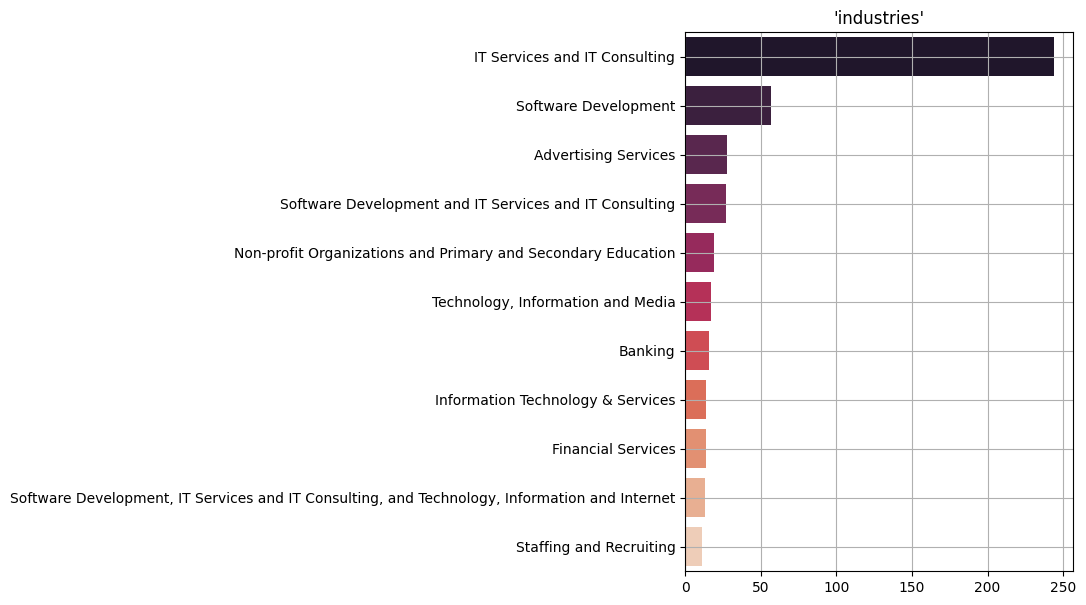

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['industries'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'industries'")

Text(0.5, 1.0, "'company'")

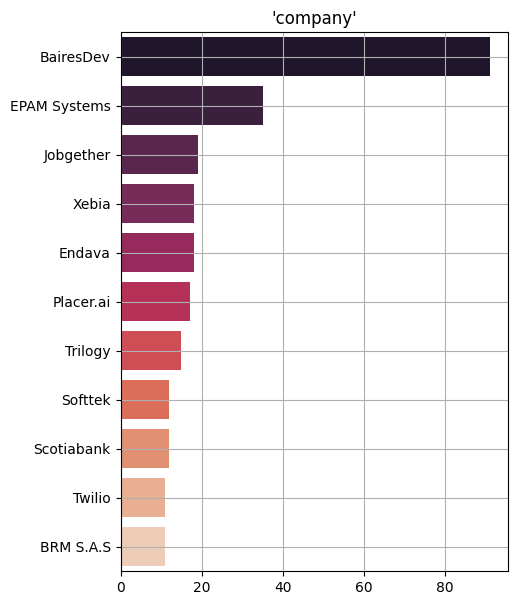

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['company'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'company'")

Text(0.5, 1.0, "'location'")

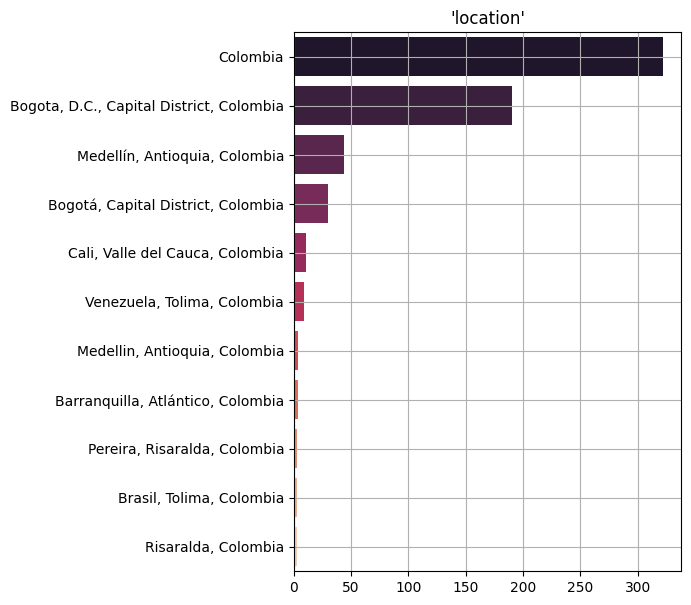

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['location'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'location'")

Text(0.5, 1.0, "'work_modality_english'")

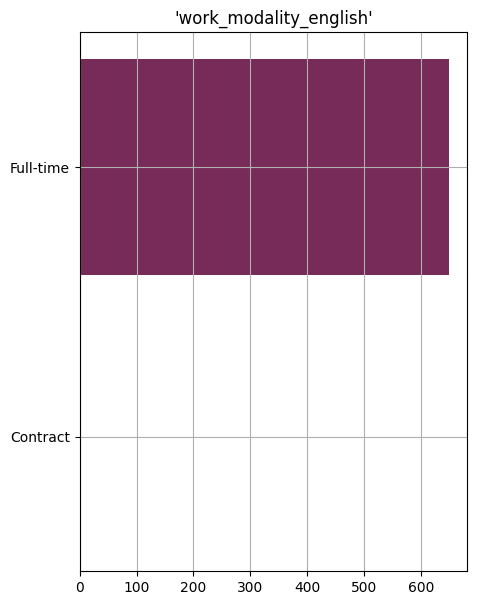

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['work_modality_english'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'work_modality_english'")

Text(0.5, 1.0, "'seniority'")

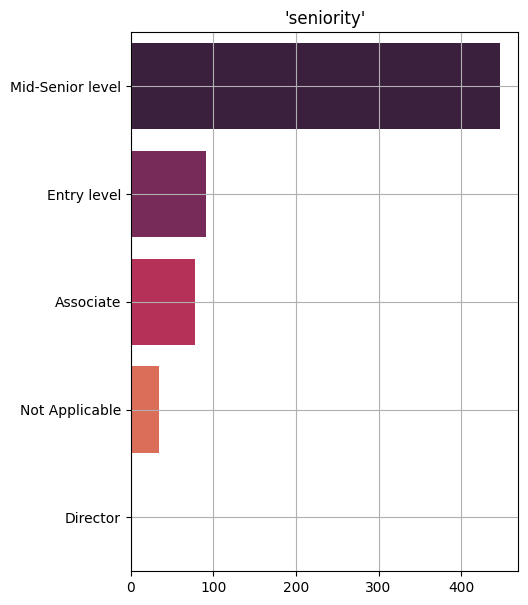

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['seniority'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'seniority'")

Text(0.5, 1.0, "'publication_date'")

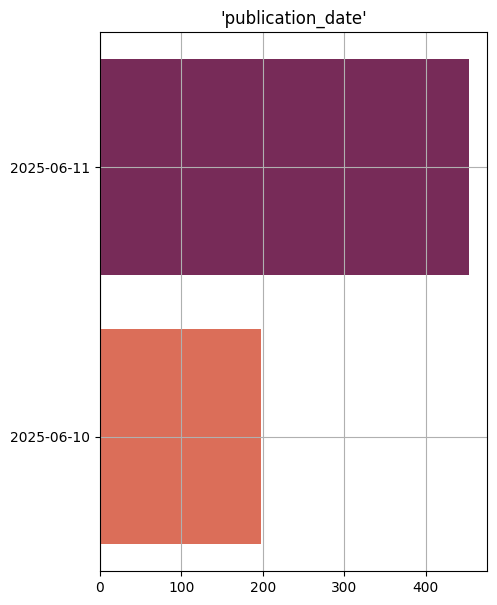

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df['publication_date'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'publication_date'")

#%%[markdown]

 # custom filters
df_ui = df[df['query_keyword'] == 'UI'].copy()
df_ui[['description', 'vacancy_name', 'seniority']].shape
df_ui.to_json('../data/vacancy_name_description.json')

#%%[markdown]

 # knowledge based filters

In [ ]:
#%%

job_seeker = open_json('../data/job_seekers.json')
job_seeker[0].keys()
seniority_criteria = job_seeker[0]['seniority']
location_criteria = job_seeker[0]['location']
work_modality_criteria = job_seeker[0]['work_modality_english']
excluded_companies = ["BairesDev"]

In [ ]:
# %%

df_filtered = df[
    (df["seniority"].isin(seniority_criteria)) &  # Filter by seniority
    (df["location"].isin(location_criteria)) &    # Filter by location
    (df["work_modality_english"].isin(work_modality_criteria)) &  # Filter by work modality
    (~df["company"].isin(excluded_companies))     # Exclude specified companies
].copy()
df_filtered.shape

(468, 14)

#%%[markdown]

 # categorical variables

Text(0.5, 1.0, "'company'")

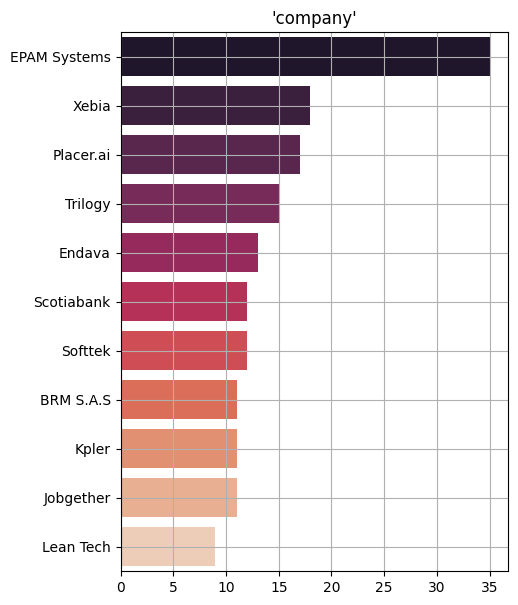

In [ ]:
plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['company'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'company'")

Text(0.5, 1.0, "'location'")

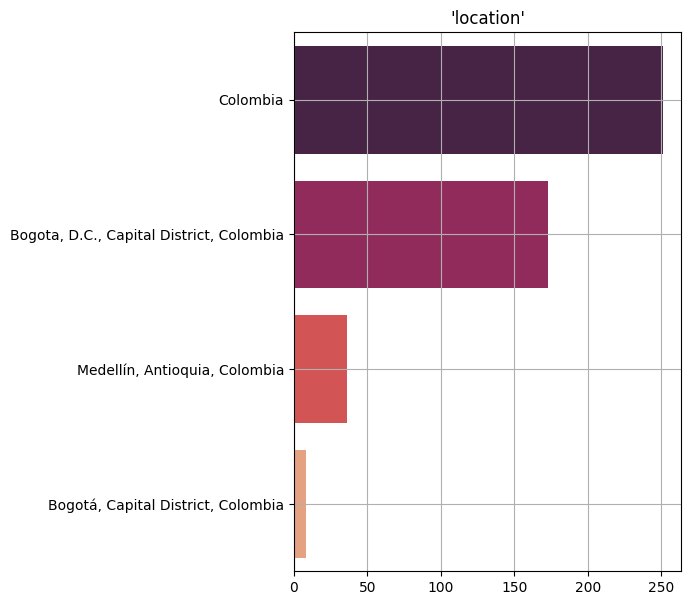

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['location'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'location'")

Text(0.5, 1.0, "'work_modality_english'")

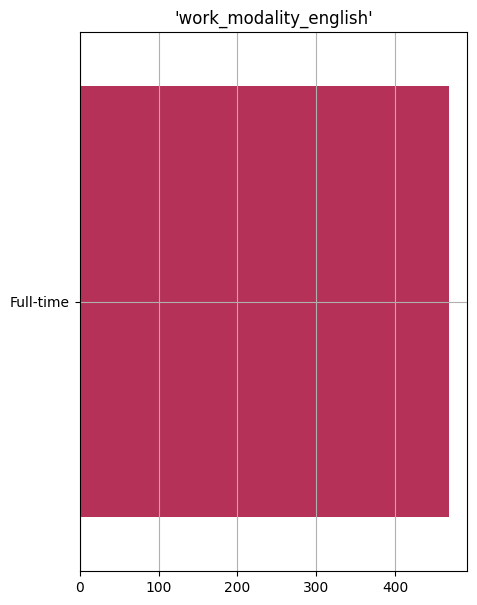

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['work_modality_english'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'work_modality_english'")

Text(0.5, 1.0, "'seniority'")

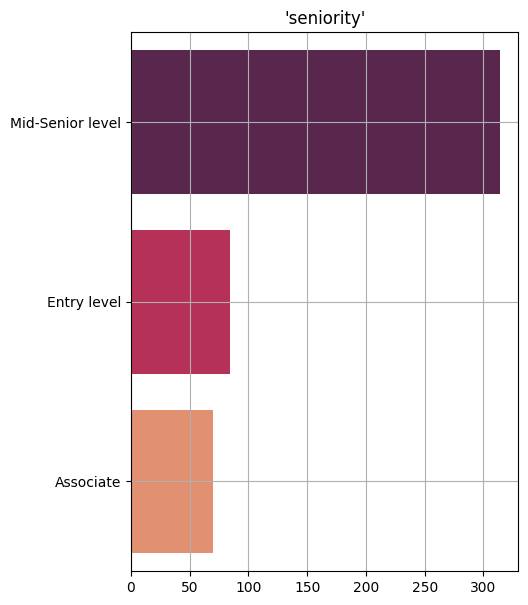

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['seniority'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'seniority'")

Text(0.5, 1.0, "'publication_date'")

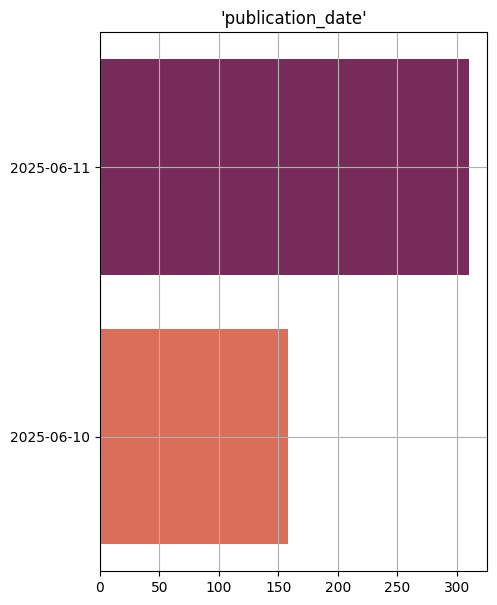

In [ ]:
#%%

plt.figure(figsize=(5,7))
a = pd.DataFrame(df_filtered['publication_date'].value_counts()[:11])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'publication_date'")

Text(0.5, 1.0, "'vacancy_name'")

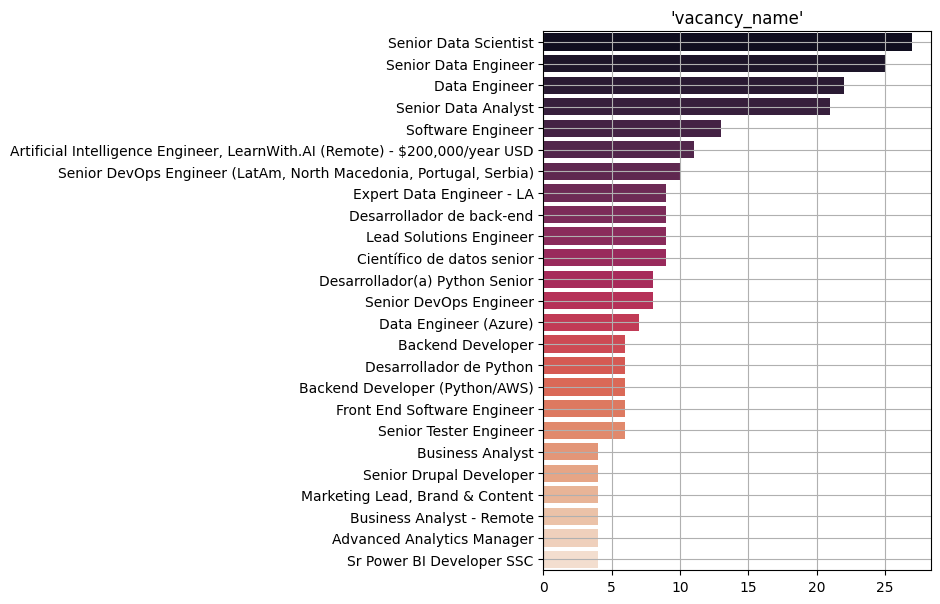

In [ ]:
#%%

plt.figure(figsize=(5,7))
df = df_filtered[df_filtered['publication_date'] > (datetime.now() - timedelta(days=3)).strftime('%Y-%m-%d')]
a = pd.DataFrame(df['vacancy_name'].value_counts()[:25])
y = np.array(list(a.index))
x = np.array(list(a['count']))
sns.barplot(x=x, y=y, palette="rocket", hue=y, legend=False)
plt.grid(True)
plt.title("'vacancy_name'")